#  Loading Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
df = pd.read_csv('../input/hotel-booking-demand/hotel_bookings.csv')

#  Exploring & Preparing Data

In [3]:
df.shape

(119390, 32)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# Remove Company Column From The Data
df = df.drop('company',axis =1)

In [7]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PLW        1
ASM        1
MDG        1
ATF        1
MLI        1
Name: country, Length: 177, dtype: int64

In [8]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [9]:
df = df.dropna(subset = ['agent'])
df = df.dropna(subset = ['children'])

In [10]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           154
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [11]:
df["country"].fillna("other country", inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

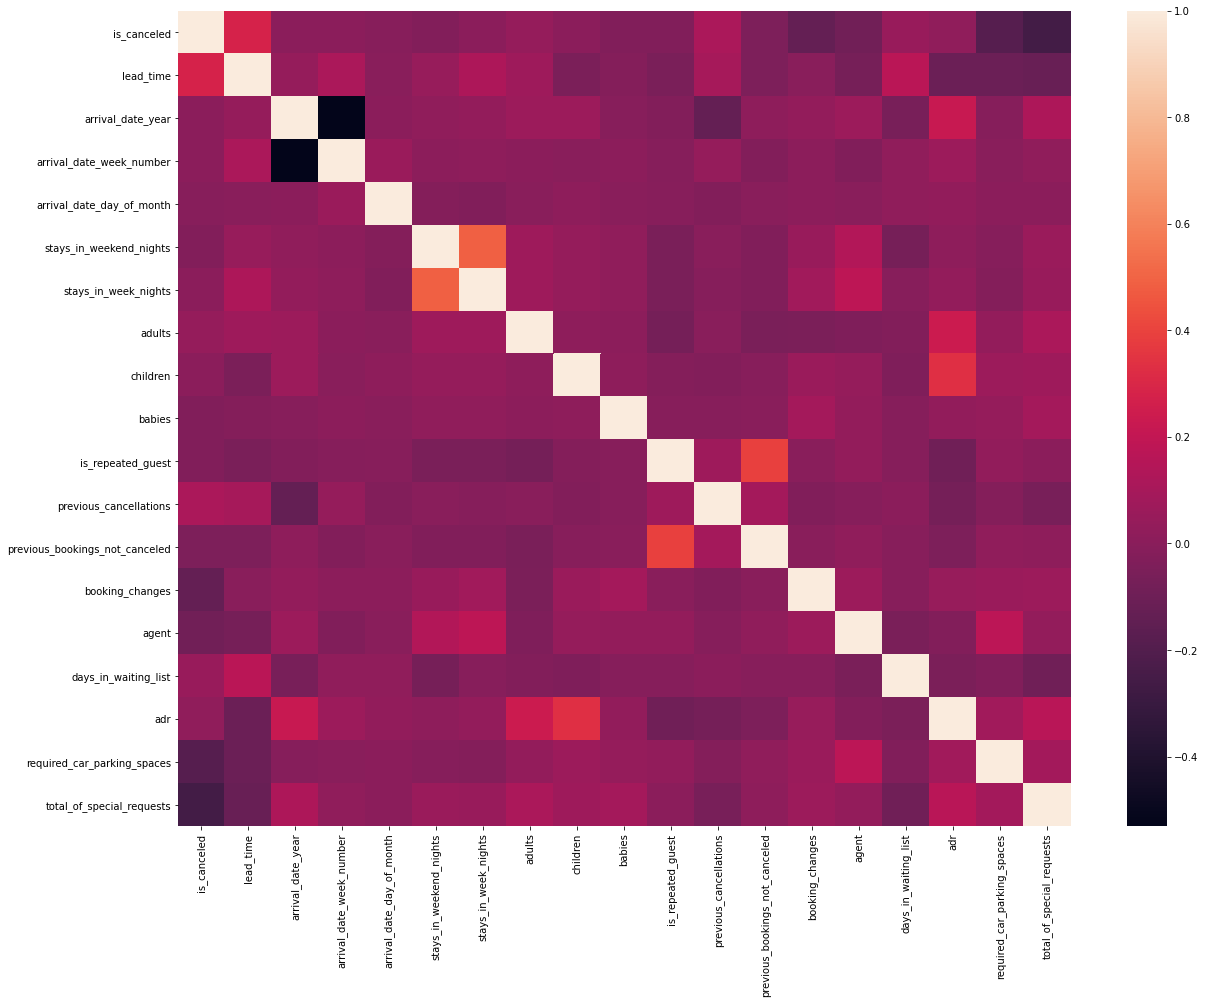

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,15))
ax = sns.heatmap(df.corr())

###  Encodings Data

In [14]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Change date columns 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['arrival_date_month'] = le.fit_transform(df['arrival_date_month'])


#### Use  OneHotEncoder

In [16]:
df_one_hot_encoder = df

In [17]:
df_one_hot_encoder = pd.get_dummies(data=df_one_hot_encoder, columns=['hotel', 
                                                 'meal',
                                                'country',
                                                 'market_segment',
                                                 'distribution_channel',
                                                'reserved_room_type',
                                                 'assigned_room_type',
                                                'deposit_type',
                                                'customer_type',
                                                'reservation_status',
                                                 'reservation_status_date'])

In [18]:
df_one_hot_encoder.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
3,0,13,2015,5,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,14,2015,5,27,1,0,2,2,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,14,2015,5,27,1,0,2,2,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0,9,2015,5,27,1,0,2,2,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1,85,2015,5,27,1,0,3,2,0.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_OHE = df_one_hot_encoder.drop('is_canceled',axis=1)
y_OHE = df_one_hot_encoder['is_canceled']

#### Use LabelEncoder

In [20]:
df_label_encoder = df 

In [21]:
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    return le.transform(feat)

In [22]:
for col in df_label_encoder.columns:
    if isinstance(df_label_encoder[str(col)],object):
        df_label_encoder[str(col)] = label_encoded(df[str(col)])

In [23]:
df_label_encoder.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,1,0,13,0,5,26,0,0,1,1,...,0,0,220,0,2,2068,0,0,1,119
4,1,0,14,0,5,26,0,0,2,2,...,0,0,173,0,2,3447,0,1,1,120
5,1,0,14,0,5,26,0,0,2,2,...,0,0,173,0,2,3447,0,1,1,120
7,1,0,9,0,5,26,0,0,2,2,...,0,0,219,0,2,3740,0,1,1,120
8,1,1,85,0,5,26,0,0,3,2,...,0,0,173,0,2,2488,0,1,0,70


In [24]:
X_LE = df_label_encoder.drop('is_canceled',axis=1)
y_LE = df_label_encoder['is_canceled']

In [25]:
from sklearn.model_selection import train_test_split

X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(
    X_OHE, y_OHE, test_size=0.4, random_state=42)

In [26]:
X_train_LE, X_test_LE, y_train_LE, y_test_LE = train_test_split(
    X_LE, y_LE, test_size=0.4, random_state=42)

# Building The Model Using RF

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_OHE = RandomForestClassifier(n_estimators=400)

In [28]:
model_OHE.fit(X_train_OHE,y_train_OHE)

RandomForestClassifier(n_estimators=400)

In [29]:
y_pred_OHE = model_OHE.predict(X_test_OHE)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test_OHE,y_pred_OHE)

1.0

In [31]:
confusion_matrix(y_test_OHE,y_pred_OHE)

array([[25062,     0],
       [    0, 16158]])

In [32]:
model_LE = RandomForestClassifier(n_estimators=400)

In [33]:
model_LE.fit(X_train_LE,y_train_LE)

RandomForestClassifier(n_estimators=400)

In [34]:
y_pred_LE = model_LE.predict(X_test_LE)

In [35]:
accuracy_score(y_test_LE,y_pred_LE)

1.0

In [36]:
confusion_matrix(y_test_LE,y_pred_LE)

array([[25062,     0],
       [    0, 16158]])